<a href="https://colab.research.google.com/github/youuRee/DeepLearning_Lecture/blob/main/Part2_2_Deep_Learning_Implementation_of_MNIST_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Learning Env. Setting**

W/B shapes
W1/B1: (784, 64)/(64,)
W2/B2: (64, 32)/(32,)
W3/B3: (32, 10)/(10,)


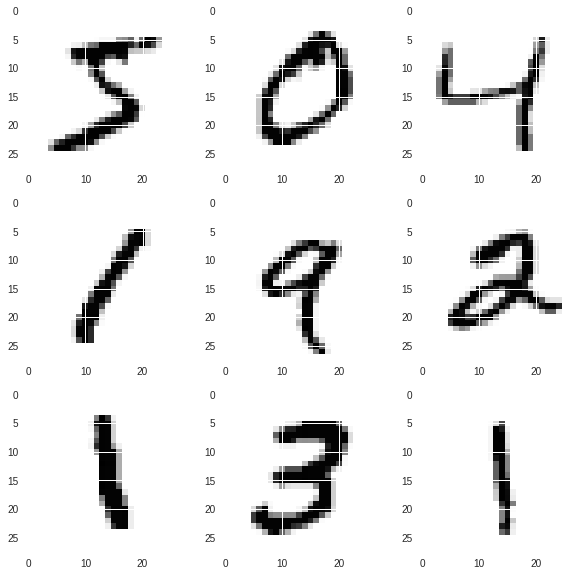

In [ ]:
import numpy as np
from termcolor import colored
from tensorflow.keras.datasets import mnist #mnist dataset 가져오기 
import matplotlib.pyplot as plt # 그래프 시각화 라이브러리 가져오기
plt.style.use("seaborn")

#Load mnist dataset
(train_images, train_labels), test_datasets = mnist.load_data() # mnist dataset 가져온거 load

# 사진 잘 나오는지 test
view_images = train_images[:9]  #9장만 가져와서 test
fig,axes = plt.subplots(3,3, figsize =(10,10))
for ax_idx, ax in enumerate (axes.flat):
  image = view_images[ax_idx]
  ax.imshow(image)

#Set params(parameter setting)
N = train_images.shape[0] # n_data에 mnist dataset shape(60000장,28x28) 넣기 
n_feature = train_images.shape[1] * train_images.shape[2] # 28x28 사이즈 이미지를 일렬로 벡터(784) 만들기 
epochs = 20 # 전체 데이터 학습 횟수
lr = 0.03
batch_size = 64 
n_batch = N // batch_size
units = [64, 32, 10] # 각 3개의 dense layer마다 가지고 있는 뉴런 갯수/ 숫자는 0~9까지 있기 때문에 마지막 dense layer의 뉴런은 10개로!

#Initialize W, B
W1 = np.random.normal(0, 1, (n_feature, units[0])) # 위에서 일렬로 만들어준 벡터를 dense layer에 input
B1 = np.zeros(units[0], )

W2 = np.random.normal(0, 1, (units[0], units[1]))
B2 = np.zeros(units[1], )

W3 = np.random.normal(0, 1, (units[1], units[2]))
B3 = np.zeros(units[2], )

#Confirm
print(colored("W/B shapes", "green"))
print(f"W1/B1: {W1.shape}/{B1.shape}") # (뉴런의 weight vector가 가지고 있는 원소 갯수(784개), 우리가 설정한 뉴런 갯수(64개) ) / 바이어스 갯수
print(f"W2/B2: {W2.shape}/{B2.shape}")
print(f"W3/B3: {W3.shape}/{B3.shape}")

**Training**

In [ ]:
losses, accs = list(), list() # loss와 accuracy 담을 리스트 생성
# 전체 데이터 = 784, epoch = 20, batch_size = 64
# 784 // 64 = 12 -> 12번 학습하면 epoch 1번 -> 이 과정을 20번 더 함 -> 학습 횟수 증가하니 정확도 상승 
for epoch in range(epochs):
    n_correct, n_data = 0, 0  # accuracy 구하기 위해서 epoch에서 몇 번 맞췄는지 구하기
    for batch_idx in range(n_batch):

        #Get mini-batch
        start_idx = batch_idx * batch_size # 시작점
        end_idx = (batch_idx + 1) * batch_size # start_idx + batch_size -> 끝점
        X = train_images[start_idx : end_idx, :].reshape(batch_size, -1) 
        Y = train_labels[start_idx : end_idx]

        #Forward propagation
        ##Dense 01
        Z1 = X @ W1 + B1
        A1 = 1 / (1 + np.exp(-Z1)) # Activation function -> sigmoid

        ##Dense 02
        Z2 = A1 @ W2 + B2
        A2 = 1 / (1 + np.exp(-Z2))

        ##Dense 03
        L = A2 @ W3 + B3

        ##Loss
        Pred = np.exp(L) / np.sum(np.exp(L), axis = 1, keepdims = True) # Softmax 함수 
        J = np.mean(-np.log(Pred[np.arange(batch_size), Y])) # CCEE
        losses.append(J)

        ##Calculate accuracy
        Pred_labels = np.argmax(Pred, axis = 1) # Softmax를 통해 나온 결과 중 최대값의 인덱스를 얻고자 할 때 사용
        n_correct += np.sum(Pred_labels == Y) # 모델이 예측한것과 실제 값과 같은 것만 n_correct에 누적
        n_data += batch_size # n_data에 학습 횟수 누적



        #Backpropagation

        ##Label one hot encoding
        labels = Y.copy() 
        Y = np.zeros_like(Pred)
        Y[np.arange(batch_size), labels] = 1 # 벡터들을 행렬 형태로 원핫인코딩

        ##Jacobians
        ###Loss
        dL = -1/batch_size * (Y - Pred)

        ###Dense 03
        dA2 = dL @ W3.T
        dW3 = A2.T @ dL
        dB3 = np.sum(dL, axis = 0) # axis = 0 : 행렬의 col끼리의 합, axis = 1 : 행렬의 row끼리의 합

        ###Dense 02
        dZ2 = dA2 * A2 * (1 - A2)
        dA1 = dZ2 @ W2.T
        dW2 = A1.T @ dZ2
        dB2 = np.sum(dZ2, axis = 0)

        ###Dense 01
        dZ1 = dA1 * A1 * (1 - A1)
        dW1 = X.T @ dZ1
        dB1 = np.sum(dZ1, axis = 0)

        #Parameter update
        W3, B3 = W3 - lr * dW3, B3 - lr * dB3
        W2, B2 = W2 - lr * dW2, B2 - lr * dB2
        W1, B1 = W1 - lr * dW1, B1 - lr * dB1

    accs.append(n_correct / n_data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app


**Result Visualization**

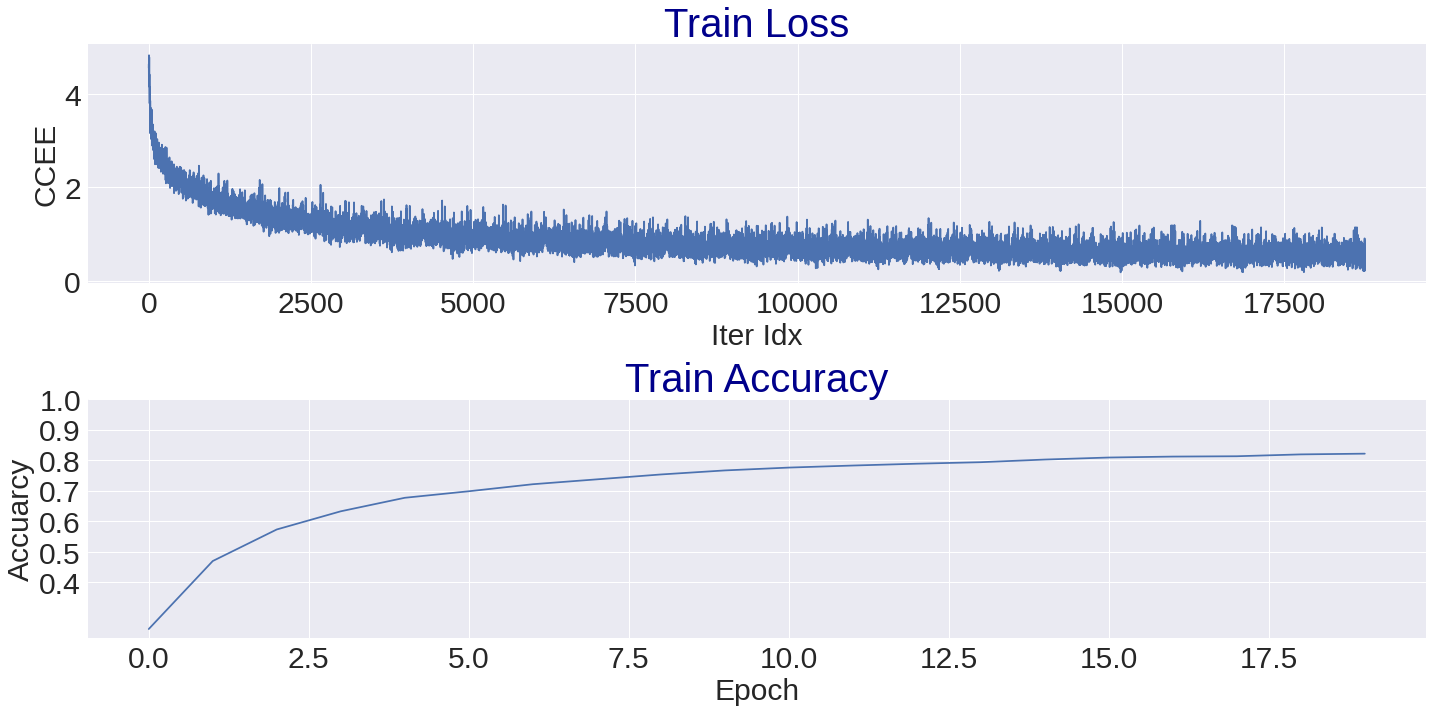

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(20, 10))
axes[0].plot(losses)
axes[1].plot(accs)
axes[0].set_title("Train Loss", color='darkblue', fontsize=40)
axes[0].set_xlabel("Iter Idx", fontsize=30)
axes[0].set_ylabel("CCEE", fontsize=30)
axes[1].set_title("Train Accuracy", color='darkblue', fontsize=40)
axes[1].set_xlabel("Epoch", fontsize=30)
axes[1].set_ylabel("Accuarcy", fontsize=30)
axes[1].set_yticks(np.linspace(0.4, 1.0, 7))
axes[0].tick_params(labelsize=30)
axes[1].tick_params(labelsize=30)
fig.tight_layout()